In [1]:
#Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
from matplotlib.lines import Line2D  # for legend handle

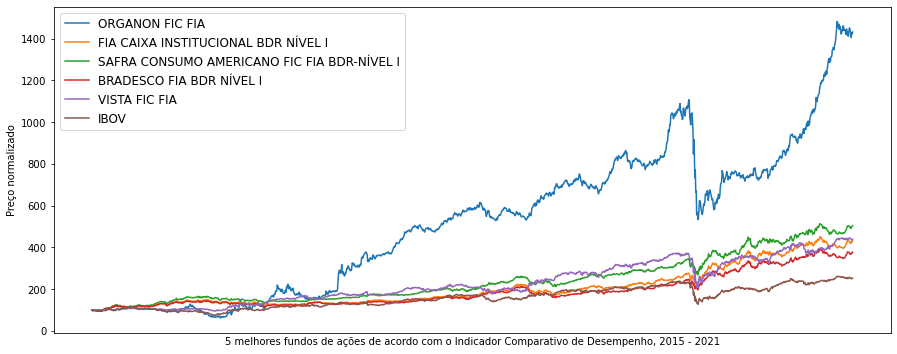

In [2]:
kpi_df = pd.read_csv('ranking kpi.csv')

kpi_acoes_df = kpi_df.loc[((kpi_df.classe == 'Fundo de Ações') & (kpi_df.nomeAbreviado != 'SANTANDER FI COLABORADORES MAGAZINE LUIZA AÇÕES'))]
kpi_acoes_df.reset_index(inplace=True, drop=True)

for index, row in kpi_acoes_df.head(5).iterrows():
    filename = f'{re.sub("[^0-9]", "", row["CNPJ_FUNDO"])}.csv'
    nome = row['nomeAbreviado']
    
    cnpj_desempenho = pd.read_csv(f'CNPJ Desempenho/{filename}')
    if index == 0:
        cotas_df = pd.DataFrame()
        cotas_df['DT_COMPTC'] = cnpj_desempenho['DT_COMPTC']
        cotas_df[nome] = cnpj_desempenho['VL_QUOTA']
    else: 
        cotas_df = pd.merge(cotas_df, cnpj_desempenho[['DT_COMPTC', 'VL_QUOTA']], on='DT_COMPTC', how='left')
        cotas_df.rename(columns={'VL_QUOTA': nome}, inplace=True)

cotas_df = cotas_df.dropna(how='any',axis=0) 

ibov = pd.read_csv('ibov.csv')
ibov = ibov[['Date', 'Adj Close']]
ibov.columns = ['DT_COMPTC', 'IBOV']

cotas_df = pd.merge(cotas_df, ibov, on='DT_COMPTC', how='left')
cotas_df.fillna(method='ffill', inplace=True)

df1 = cotas_df.set_index('DT_COMPTC')

df3 = df1.divide(df1.iloc[0] / 100)

plt.figure(figsize=(15, 6))
for i in range(df3.shape[1]):
    plt.plot(df3.iloc[:,i], label=df3.columns.values[i])
plt.legend(loc='upper left', fontsize=12)

plt.gca().axes.get_xaxis().set_ticks([])

plt.ylabel('Preço normalizado')
plt.xlabel('5 melhores fundos de ações de acordo com o Indicador Comparativo de Desempenho, 2015 - 2021')

plt.show()



In [3]:
kpi_acoes_df

,CNPJ_FUNDO,nomeAbreviado,kpi,annualized_return,retorno_1_ano,annualized_sharpe,classe,txa_adm_%aa,patrimonio,idade,retorno_3_anos,retorno_5_anos,retorno_10_anos
0,17.400.251/0001-66,ORGANON FIC FIA,9.04,0.449677,0.904389,0.929462,Fundo de Ações,0.0,1.063009e+08,8.0,1.413317,7.597910,0.000000
1,17.502.937/0001-68,FIA CAIXA INSTITUCIONAL BDR NÍVEL I,8.89,0.237219,0.344732,1.297409,Fundo de Ações,0.7,3.108345e+09,8.0,1.230133,2.368192,0.000000
2,19.436.835/0001-17,SAFRA CONSUMO AMERICANO FIC FIA BDR-NÍVEL I,8.69,0.281627,0.382767,1.419782,Fundo de Ações,1.0,2.112275e+09,7.0,1.195360,2.556570,0.000000
3,13.401.215/0001-66,BRADESCO FIA BDR NÍVEL I,8.46,0.230963,0.319164,1.357786,Fundo de Ações,1.5,7.847087e+08,9.0,1.034973,2.043662,0.000000
4,21.329.166/0001-26,VISTA FIC FIA,8.44,0.232299,0.262204,1.019427,Fundo de Ações,0.0,5.500677e+08,6.0,1.162382,1.930256,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,29.549.642/0001-26,SANTANDER SELEÇÃO CRESCIMENTO AÇÕES FIC FI,1.48,0.070382,0.137863,0.450819,Fundo de Ações,2.0,1.394964e+09,3.0,0.419876,0.000000,0.000000
316,08.749.127/0001-10,ITAÚ UNIBANCO AÇÕES FIC FI,1.20,0.070671,0.087983,0.325834,Fundo de Ações,3.0,1.447530e+08,14.0,0.032134,0.596957,1.336955
317,47.177.431/0001-91,ALFA FIC FIA,1.03,-0.030002,0.087960,-0.049874,Fundo de Ações,8.5,7.829470e+06,51.0,0.107254,0.028611,-0.508556
318,29.197.177/0001-01,ITAÚ AÇÕES PETROBRAS I FI,0.73,0.025138,0.179718,0.366841,Fundo de Ações,3.0,1.161705e+08,3.0,0.249741,0.000000,0.000000


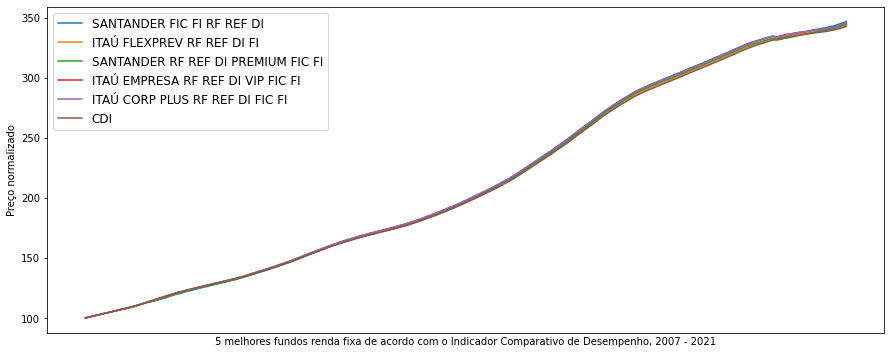

In [4]:
kpi_df = pd.read_csv('ranking kpi.csv')

kpi_rf_df = kpi_df.loc[((kpi_df.classe == 'Fundo de Renda Fixa'))]
kpi_rf_df = kpi_rf_df.sort_values(by='kpi', ascending=False)

kpi_rf_df.reset_index(inplace=True, drop=True)

for index, row in kpi_rf_df.head(5).iterrows():
    filename = f'{re.sub("[^0-9]", "", row["CNPJ_FUNDO"])}.csv'
    nome = row['nomeAbreviado']
    
    cnpj_desempenho = pd.read_csv(f'CNPJ Desempenho/{filename}')
    if index == 0:
        cotas_df = pd.DataFrame()
        cotas_df['DT_COMPTC'] = cnpj_desempenho['DT_COMPTC']
        cotas_df[nome] = cnpj_desempenho['VL_QUOTA']
    else: 
        cotas_df = pd.merge(cotas_df, cnpj_desempenho[['DT_COMPTC', 'VL_QUOTA']], on='DT_COMPTC', how='left')
        cotas_df.rename(columns={'VL_QUOTA': nome}, inplace=True)

cotas_df = cotas_df.dropna(how='any',axis=0) 

cdi = pd.read_csv('cdi.csv')
cdi = cdi[['data', 'cdi_cota']]
cdi.columns = ['DT_COMPTC', 'CDI']
cdi['DT_COMPTC'] = pd.to_datetime(cdi['DT_COMPTC'], dayfirst=True)
cotas_df['DT_COMPTC'] = pd.to_datetime(cotas_df['DT_COMPTC'])
cotas_df = pd.merge(cotas_df, cdi, on='DT_COMPTC', how='left')
cotas_df.fillna(method='ffill', inplace=True)

df1 = cotas_df.set_index('DT_COMPTC')

df3 = df1.divide(df1.iloc[0] / 100)

plt.figure(figsize=(15, 6))
for i in range(df3.shape[1]):
    plt.plot(df3.iloc[:,i], label=df3.columns.values[i])
plt.legend(loc='upper left', fontsize=12)

plt.gca().axes.get_xaxis().set_ticks([])

plt.ylabel('Preço normalizado')
plt.xlabel('5 melhores fundos renda fixa de acordo com o Indicador Comparativo de Desempenho, 2007 - 2021')

plt.show()



In [5]:
kpi_rf_df

,CNPJ_FUNDO,nomeAbreviado,kpi,annualized_return,retorno_1_ano,annualized_sharpe,classe,txa_adm_%aa,patrimonio,idade,retorno_3_anos,retorno_5_anos,retorno_10_anos
0,07.907.396/0001-02,SANTANDER FIC FI RF REF DI,8.74,0.091131,0.032729,39.228813,Fundo de Renda Fixa,0.15,4.849088e+09,15.0,0.136295,0.373068,1.303713
1,08.418.151/0001-76,ITAÚ FLEXPREV RF REF DI FI,8.72,0.086023,0.023694,43.188882,Fundo de Renda Fixa,0.00,1.403157e+10,14.0,0.135736,0.370854,1.280965
2,03.069.104/0001-40,SANTANDER RF REF DI PREMIUM FIC FI,8.58,0.100492,0.032169,36.646689,Fundo de Renda Fixa,0.20,5.888502e+09,22.0,0.134506,0.369571,1.292941
3,08.009.152/0001-67,ITAÚ EMPRESA RF REF DI VIP FIC FI,8.57,0.091658,0.027338,39.585389,Fundo de Renda Fixa,0.18,2.845680e+09,15.0,0.132822,0.365423,1.284825
4,01.599.628/0001-18,ITAÚ CORP PLUS RF REF DI FIC FI,8.54,0.100743,0.027358,37.687266,Fundo de Renda Fixa,0.18,6.236231e+09,24.0,0.132865,0.365479,1.284946
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,19.324.345/0001-29,BRB FIC FI EM RF DI MEGA LP,0.96,0.059981,0.017088,1.632023,Fundo de Renda Fixa,0.60,2.707175e+07,7.0,-0.014351,0.170086,0.000000
656,27.826.059/0001-90,DLM PREMIUM 30 FI RF CP LP,0.87,0.033042,0.050080,2.574989,Fundo de Renda Fixa,0.60,2.573889e+08,3.0,0.097059,0.000000,0.000000
657,20.628.685/0001-22,BRADESCO FC DE FI RF REF DI FEDERAL OP,0.63,0.051707,0.012974,0.687025,Fundo de Renda Fixa,1.00,7.272961e+06,7.0,0.080544,0.137132,0.000000
658,29.011.158/0001-49,NEXT FIC FI RF ATIVO,0.60,0.028646,0.009127,2.271633,Fundo de Renda Fixa,1.00,1.213260e+07,3.0,0.117112,0.000000,0.000000


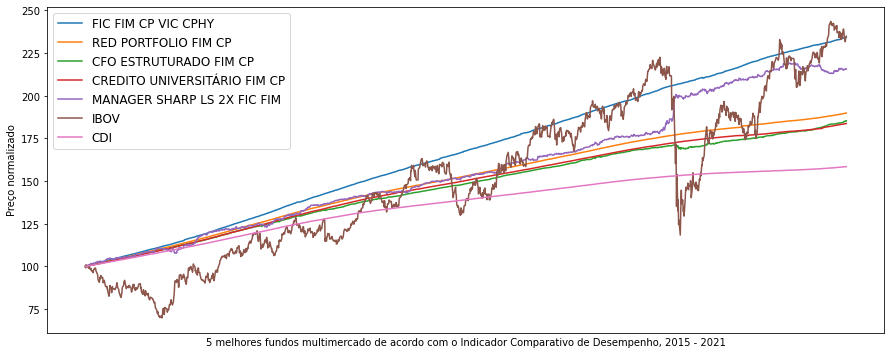

In [6]:
kpi_df = pd.read_csv('ranking kpi.csv')

kpi_mm_df = kpi_df.loc[((kpi_df.classe == 'Fundo Multimercado'))]
kpi_mm_df.reset_index(inplace=True, drop=True)

for index, row in kpi_mm_df.head(5).iterrows():
    filename = f'{re.sub("[^0-9]", "", row["CNPJ_FUNDO"])}.csv'
    nome = row['nomeAbreviado']
    
    cnpj_desempenho = pd.read_csv(f'CNPJ Desempenho/{filename}')
    if index == 0:
        cotas_df = pd.DataFrame()
        cotas_df['DT_COMPTC'] = cnpj_desempenho['DT_COMPTC']
        cotas_df[nome] = cnpj_desempenho['VL_QUOTA']
    else: 
        cotas_df = pd.merge(cotas_df, cnpj_desempenho[['DT_COMPTC', 'VL_QUOTA']], on='DT_COMPTC', how='left')
        cotas_df.rename(columns={'VL_QUOTA': nome}, inplace=True)

cotas_df = cotas_df.dropna(how='any',axis=0) 

ibov = pd.read_csv('ibov.csv')
ibov = ibov[['Date', 'Adj Close']]
ibov.columns = ['DT_COMPTC', 'IBOV']

cotas_df = pd.merge(cotas_df, ibov, on='DT_COMPTC', how='left')
cotas_df.fillna(method='ffill', inplace=True)

cdi = pd.read_csv('cdi.csv')
cdi = cdi[['data', 'cdi_cota']]
cdi.columns = ['DT_COMPTC', 'CDI']
cdi['DT_COMPTC'] = pd.to_datetime(cdi['DT_COMPTC'], dayfirst=True)
cotas_df['DT_COMPTC'] = pd.to_datetime(cotas_df['DT_COMPTC'])
cotas_df = pd.merge(cotas_df, cdi, on='DT_COMPTC', how='left')
cotas_df.fillna(method='ffill', inplace=True)


df1 = cotas_df.set_index('DT_COMPTC')

df3 = df1.divide(df1.iloc[0] / 100)

plt.figure(figsize=(15, 6))
for i in range(df3.shape[1]):
    plt.plot(df3.iloc[:,i], label=df3.columns.values[i])
plt.legend(loc='upper left', fontsize=12)

plt.gca().axes.get_xaxis().set_ticks([])

plt.ylabel('Preço normalizado')
plt.xlabel('5 melhores fundos multimercado de acordo com o Indicador Comparativo de Desempenho, 2015 - 2021')

plt.show()

In [7]:
kpi_mm_df

,CNPJ_FUNDO,nomeAbreviado,kpi,annualized_return,retorno_1_ano,annualized_sharpe,classe,txa_adm_%aa,patrimonio,idade,retorno_3_anos,retorno_5_anos,retorno_10_anos
0,22.150.568/0001-21,FIC FIM CP VIC CPHY,9.14,0.129737,0.097464,29.518949,Fundo Multimercado,0.03,1.869292e+08,6.0,0.386982,0.908822,0.000000
1,14.466.786/0001-41,RED PORTFOLIO FIM CP,8.86,0.109082,0.051909,42.424758,Fundo Multimercado,0.03,5.950927e+07,9.0,0.235141,0.586002,0.000000
2,12.766.824/0001-56,CFO ESTRUTURADO FIM CP,8.79,0.104539,0.071050,13.209761,Fundo Multimercado,0.53,6.469882e+08,10.0,0.242181,0.564109,1.854432
3,13.554.172/0001-59,CREDITO UNIVERSITÁRIO FIM CP,8.63,0.101353,0.045412,32.025256,Fundo Multimercado,0.03,5.405851e+07,10.0,0.216681,0.551385,0.000000
4,21.940.710/0001-71,MANAGER SHARP LS 2X FIC FIM,8.37,0.120062,0.051749,3.196791,Fundo Multimercado,0.00,3.035445e+08,6.0,0.408492,0.777319,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,29.250.108/0001-14,WMR MULTIESTRATÉGIA FIC FIM,0.68,0.011047,0.029517,0.379823,Fundo Multimercado,0.85,3.202318e+07,3.0,0.054631,0.000000,0.000000
486,29.298.529/0001-15,ADAM MACRO STRATEGY ADVISORY D60 FIC FIM,0.65,0.024023,0.042447,0.602289,Fundo Multimercado,1.90,2.842205e+08,3.0,0.132171,0.000000,0.000000
487,28.516.026/0001-06,BRADESCO FIC FIM ABSOLUTO 42 ÁGORA,0.64,0.027624,0.017728,0.435433,Fundo Multimercado,1.75,3.469737e+06,3.0,0.168178,0.000000,0.000000
488,29.286.406/0001-64,ADAM MACRO STRATEGY II D60 FIC FIM,0.60,0.023453,0.041908,0.597294,Fundo Multimercado,1.90,2.671899e+08,3.0,0.130645,0.000000,0.000000
